#**Q-Learning y SARSA**

### **Q-Learning**

Q-learning es una técnica de aprendizaje por refuerzo que tiene como objetivo aprender una estrategia que le diga a un agente qué acción tomar bajo qué circunstancias.


la actualización de la tabla Q utiliza siempre la **mejor acción posible** en el siguiente estado (es decir, maximiza sobre todas las acciones).

Esto se traduce en la siguiente regla de actualización:

𝑄
(
𝑠
,
𝑎
)
←
𝑄
(
𝑠
,
𝑎
)

+

𝛼
[
𝑟

+

𝛾
max
⁡
𝑎
′
𝑄
(
𝑠
′
,
𝑎
′
)

−

𝑄
(
𝑠
,
𝑎
)
]
,

donde

𝛼
: es la tasa de aprendizaje (learning rate),

𝑟
: es la recompensa recibida al pasar de
𝑠
 a
𝑠
′
  tras ejecutar
𝑎
,

𝛾
: es el factor de descuento (discount factor),es un valor entre 0 y 1 que controla cuánto el agente valora las recompensas futuras en comparación con las recompensas inmediatas.

max
⁡
𝑎
′
𝑄
(
𝑠
′
,
𝑎
′
)
: es el valor óptimo aproximado en el próximo estado
𝑠
′
 .

### **SARSA**

El SARSA-learning (State–action–reward–state–action) es una técnica de aprendizaje por refuerzo similar al Q-learning, con la diferencia de que en la Q-función no selecciona el valor máximo esperado $\underset{{a}'}{max} Q({s}',{a}')$, si no que selecciona la acción que hubiesemos tomado en ese nuevo estado ${s}'$.

la actualización de la función
𝑄
Q usa la acción realmente seleccionada bajo la misma política
𝜀
ε-greedy (u otra) en el próximo estado.

Dicha actualización se expresa como:

𝑄
(
𝑠
,
𝑎
)
←
𝑄
(
𝑠
,
𝑎
)

+

𝛼
[
𝑟

+

𝛾

𝑄
(
𝑠
′
,
𝑎
′
)

−

𝑄
(
𝑠
,
𝑎
)
]
,
donde :


𝑎
′
 es la acción que efectivamente va a ejecutarse en
𝑠
′
 según la política actual (y no necesariamente la que maximice
𝑄).

En ambos casos:

Se observa un estado
𝑠.

Se elige una acción
𝑎
: siguiendo alguna política basada en la tabla
𝑄
, típicamente
𝜀
ε-greedy (con probabilidad
𝜀)
 se explora con una acción aleatoria; con probabilidad
1
−
𝜀
: se elige la acción con mayor
𝑄
(
𝑠
,
𝑎
).

Se interactúa con el entorno: se recibe una recompensa
𝑟
 y se transita a un nuevo estado
𝑠
′
 .

Se actualiza la entrada
𝑄
(
𝑠
,
𝑎
) según la fórmula del algoritmo correspondiente (Q-Learning o SARSA).

En SARSA, se determina la siguiente acción
𝑎
′
  en
𝑠
′

  (nuevamente con
𝜀
ε-greedy) antes de actualizar
𝑄
(
𝑠
,
𝑎
)
, porque la fórmula usa
𝑄
(
𝑠
′
,
𝑎
′
)
. En Q-Learning, no se necesita escoger
𝑎
′
  para la actualización, pues se usa
max
⁡
𝑎
′
𝑄
(
𝑠
′
,
𝑎
′
)
.

### **Diferencias y Usos**

Q-Learning aprende la **funcion de valor óptima** (o aproximada) independientemente de la política de exploración. Incluso si la política
ε-greedy toma acciones subóptimas en ocasiones, Q-Learning utiliza siempre el máximo sobre
𝑄
(
𝑠
′
,
𝑎
′
).

SARSA aprende la función de valor de la **misma política** que se está usando para explorar (la política “behaviour”), porque considera el
𝑄
(
𝑠
′
,
𝑎
′
)
 de la acción que en verdad se selecciona en
𝑠
′
 .



 **¿Cuándo utilizar cada uno?**

Q-Learning es apropiado si:

Queremos aproximarnos lo más rápido posible a la política óptima suponiendo que nuestra exploración es suficiente.

El entorno no contiene “zonas catastróficas” donde la exploración ocasional pueda causar consecuencias de largo plazo muy negativas.

SARSA es preferible si:

El entorno es **riesgoso** o “no cobertor” (es decir, hay estados donde la exploración puede provocar terminaciones muy malas).

Nos interesa aprender una política que incluya explícitamente el comportamiento derivado de la estrategia
𝜀
ε-greedy, y por tanto “observe” el riesgo inherente a explorar.

Se desea mayor “estabilidad” en entornos estocásticos con transiciones abruptas o castigos catastróficos.



In [ ]:
Q-Learning

# **Descripción del entorno utilizado: Blackjack-v1**

### **¿Qué es Blackjack?**
Blackjack (o “21”) es un juego de cartas en el que el jugador (representado por el agente) y el crupier se trazan cartas de un mazo estándar. El objetivo del jugador es acercarse lo más posible a 21 sin pasarse (bust, >21), y a la vez vencer al crupier.

Al inicio, el jugador recibe dos cartas y ve una carta boca arriba del crupier (la otra está oculta).

En cada paso, el jugador puede decidir entre:

“Hit” (pedir una carta): se le reparte una carta adicional y la suma puede exceder 21 (lo que causa un **bust**).

“Stick” (plantarse): el turno del jugador termina y el crupier saca cartas siguiendo una política fija (por ejemplo, siempre pide si suma < 17, se planta en 17).

Si el jugador se planta, el crupier saca cartas hasta alcanzar al menos 17.

Si el jugador no se pasa de 21 y su suma final es mayor que la del crupier (o el crupier se pasa), el jugador gana (
+
1
). Si hay empate, el resultado es empate (
0
). Si el jugador se pasa o su suma es menor, el jugador pierde (
−
1
).

### **Parámetros del entorno**

env = gym.make('Blackjack-v1', sab=True)

se utiliza la variante llamada “SAB rules” (Sutton and Barto) de Blackjack, que introduce dos particularidades:

El crupier se planta “soft” en 17 (es decir, si su mano es “A+6”→17 “suave”, el crupier se planta en vez de pedir).

El mazo se baraja tras cada episodio (o cada mano), lo cuál hace el juego estocástico en cada episodio.

De este modo, los estados siguientes no dependen de un mazo fijo, sino de una baraja barajada aleatoriamente en cada mano.

**Espacio de observaciones (Observation Space)**

En este entorno la observación (state) es un tuple (player_sum, dealer_card, usable_ace) donde:

player_sum: suma de las cartas del jugador (un entero que va de 0 a 31, aunque en la práctica suele moverse entre 4 y 21+).

dealer_card: carta visible del crupier (entero de 1 hasta 10, donde 1 significa As contando como 11 o 1 según convenga).

usable_ace: indicador binario (0 o 1) que señala si el jugador posee un “As usable” (un As que se cuenta como 11 sin pasarse de 21).
Gym define formalmente la observación como un espacio discreto con estas tres coordenadas.

**Espacio de acciones (Action Space)**

El entorno define dos acciones posibles:

Acción 0: “Stick” (plantarse).

Acción 1: “Hit” (pedir carta).

**Recompensas (Rewards)**

Al final de cada episodio (cuando el jugador se planta o se pasa), se devuelve:

+1 si el jugador gana la mano.

0 si hay empate (“push”).

–1 si el jugador pierde (por pasarse o por quedar con suma menor al crupier).
Estas recompensas son la señal que usan tanto Q-Learning como SARSA para actualizar la tabla Q.

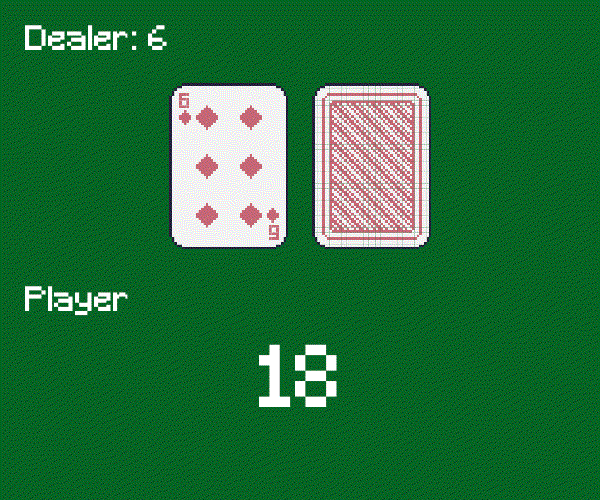

# **Aplicación de SARSA y Q-Learning**

Esta clase prepara la estructura base de un agente para tomar decisiones en Blackjack, registrando en una tabla Q la mejor estrategia posible según lo que ha aprendido.

Se configuran parámetros clave:

learning_rate (α): Cuánto se ajustan los valores de la tabla Q en cada actualización.

discount_factor (γ): Cuánto valora el agente las recompensas futuras.

ratio_exploration (ε): Define la probabilidad de tomar decisiones aleatorias en lugar de la mejor acción conocida.

In [ ]:
import gymnasium as gym
import numpy as np
import random

In [ ]:
class Learner:
    def __init__(self, environment, learning_rate=0.1, discount_factor=0.9, ratio_exploration=0.1):
        self.environment = environment  # Entorno en el que tomar las acciones
        self.learning_rate = learning_rate  # α: tasa de aprendizaje
        self.discount_factor = discount_factor # γ: factor de descuento
        self.ratio_exploration = ratio_exploration  # ε: probabilidad de exploración (ε-greedy)
        self.actions = list(range(environment.action_space.n)) # Lista [0, 1]

        # Inicializar tabla Q con ceros
        # Blackjack tiene un espacio discreto observable (player sum, dealer card, usable ace)
        self.q_table = np.zeros((32, 11, 2, len(self.actions)))  # 32=21+11 extra, dealer 1-10, usable ace 0/1

    def choose_action(self, state):
        if random.random() < self.ratio_exploration:
            return random.choice(self.actions)
        else:
            player_sum, dealer_card, usable_ace = state
            return int(np.argmax(self.q_table[player_sum][dealer_card][usable_ace]))

Clase QLearner, que hereda de Learner y implementa el algoritmo de Q-Learning para actualizar la tabla Q en función de las decisiones tomadas en el juego de Blackjack.

**Se recibe:**

old_state: Estado antes de tomar acción.

action_taken: Acción que se tomó (hit o stand).

reward: Recompensa obtenida.

new_state: Estado después de la acción.

is_final: Si la partida terminó.


Obtiene el valor Q actual (current_q) de la acción tomada en el estado anterior.

**Calcula el mejor Q futuro (future_q):**

Si el juego sigue: se toma el valor máximo de la nueva tabla Q (max(Q(s', a'))).

Si el juego terminó: se asigna 0 porque no hay más decisiones por tomar.



In [ ]:
# Q-Learning
class QLearner(Learner):
    @property
    def name(self):
        return 'QLearner'

    def update(self, old_state, action_taken, reward, new_state, is_final):
        p_sum, d_card, u_ace = old_state
        np_sum, nd_card, nu_ace = new_state
        a_idx = action_taken

        current_q = self.q_table[p_sum][d_card][u_ace][a_idx]
        future_q = max(self.q_table[np_sum][nd_card][nu_ace]) if not is_final else 0

        target = reward + self.discount_factor * future_q
        self.q_table[p_sum][d_card][u_ace][a_idx] += self.learning_rate * (target - current_q)

clase QLearner, que hereda de Learner y implementa el algoritmo de Q-Learning para actualizar la tabla Q en función de las decisiones tomadas en el juego de Blackjack.

Parámetros

Los mismos de Q-Learning, excepto que recibe adicionalmente new_action (
𝑎
′
 ), es decir, la acción que la política
𝜀
ε-greedy ha decidido tomar en el new_state.

Cálculo de la actualización SARSA

current_q = Q(old_state, action_taken).

Si is_final == False,

future_q = Q(new_state, new_action);
Si is_final == True, future_q = 0.

target = reward + γ * future_q.

Ajuste del Q actual:

𝑄
nuevo
(
𝑜
𝑙
𝑑
_
𝑠
𝑡
𝑎
𝑡
𝑒
,

𝑎
𝑐
𝑡
𝑖
𝑜
𝑛
)
=
𝑄
viejo
(
𝑜
𝑙
𝑑
_
𝑠
𝑡
𝑎
𝑡
𝑒
,

𝑎
𝑐
𝑡
𝑖
𝑜
𝑛
)
+
𝛼
[

𝑡
𝑎
𝑟
𝑔
𝑒
𝑡

−

𝑐
𝑢
𝑟
𝑟
𝑒
𝑛
𝑡
_
𝑞
]
.

In [ ]:
# SARSA
class SARSALearner(Learner):
    @property
    def name(self):
        return 'SARSA'

    def update(self, old_state, action_taken, reward, new_state, new_action, is_final):
        p_sum, d_card, u_ace = old_state
        np_sum, nd_card, nu_ace = new_state
        a_idx = action_taken
        na_idx = new_action

        current_q = self.q_table[p_sum][d_card][u_ace][a_idx]
        future_q = self.q_table[np_sum][nd_card][nu_ace][na_idx] if not is_final else 0

        target = reward + self.discount_factor * future_q
        self.q_table[p_sum][d_card][u_ace][a_idx] += self.learning_rate * (target - current_q)

**Función de entrenamiento**

Inicialización del entorno:

Se crea el entorno env = gym.make('Blackjack-v1', sab=True).

raw_env = env.unwrapped permite acceder directamente a las cartas del dealer y el jugador.

Creación del agente:

Se instancia un agente (learner_cls) con los parámetros de aprendizaje (α, γ, ε).

Se inicializan variables para rastrear el mejor episodio y almacenar recompensas.

**Flujo del episodio Para cada episodio**

Se resetea el entorno y se obtiene el estado inicial.

El agente selecciona una acción (choose_action(state)).

Mientras la partida no termine (while not done):

Se ejecuta la acción en el entorno (env.step(action)).

Se actualiza el estado y recompensa acumulada.

Se actualiza la tabla Q-Learning o SARSA según el tipo de agente.

Se elige la siguiente acción.

Cada 10 episodios, se muestra información detallada:

Carta inicial del dealer y todas las del jugador.

Acción inicial ("Pidió otra carta" / "Se plantó").

Mano completa al final de la partida y suma de cartas.

Recompensa total obtenida.

Se actualiza el mejor episodio y se almacena la recompensa total.

In [ ]:
def run_agent(learner_cls, num_episodes, learning_rate, discount_factor, ratio_exploration, verbose=False):
    env = gym.make('Blackjack-v1', sab=True)      # env viene envuelto en OrderEnforcing, etc.
    raw_env = env.unwrapped                       # → “Desenvolvemos” el wrapper para acceder a dealer y player

    learner = learner_cls(env, learning_rate, discount_factor, ratio_exploration)
    best_reward = float('-inf')
    best_episode = None
    episodes_info = []

    for ep in range(num_episodes):
        obs, _ = env.reset()
        state = (obs[0], obs[1], int(obs[2]))

        done = False
        total_reward = 0
        action = learner.choose_action(state)



        while not done:
            new_obs, reward, terminated, truncated, _ = env.step(action)
            new_state = (new_obs[0], new_obs[1], int(new_obs[2]))
            done = terminated or truncated

            total_reward += reward

            if isinstance(learner, QLearner):
                learner.update(state, action, reward, new_state, done)
                action = learner.choose_action(new_state)
            elif isinstance(learner, SARSALearner):
                new_action = learner.choose_action(new_state)
                learner.update(state, action, reward, new_state, new_action, done)
                action = new_action

            state = new_state
        # Mostrar carta inicial del dealer y mano inicial del jugador (usar raw_env)
        if ep % 10 == 0:  # cada 5 episodios
            dealer_initial_card = raw_env.dealer[0]     # solo la primera carta visible
            player_initial_cards = raw_env.player[:]    # lista completa de cartas del jugador
            print(f"Dealer carta inicial: {dealer_initial_card}, Player cartas: {player_initial_cards} (suma = {state[0]})")
            action_text = "Pidió otra carta" if action == 1 else "Se plantó"
            print(f"  -> Acción inicial: {action_text}")
            # Una vez que la mano termina, imprimimos manos completas con raw_env.dealer y raw_env.player
            final_dealer_hand = raw_env.dealer[:]    # lista de cartas que tiene el dealer al final
            final_player_hand = raw_env.player[:]    # lista de cartas del jugador al final
            print(f"*** Mano {ep+1} finalizada ***")
            print(f"   Dealer mano completa: {final_dealer_hand}, suma = {sum(final_dealer_hand)}")
            print(f"   Player mano completa: {final_player_hand}, suma = {sum(final_player_hand)}")
            print(f"   Recompensa (reward): {total_reward}\n")

        episodes_info.append(total_reward)
        if total_reward > best_reward:
            best_reward = total_reward
            best_episode = ep

        if verbose:
            print(f"Episode {ep+1}: Total Reward: {total_reward}")

    return episodes_info, best_episode


## **Ejecución comparativa de Q-Learning y SARSA**

ejecuta múltiples simulaciones de los algoritmos Q-Learning y SARSA en el entorno Blackjack-v1, con distintas configuraciones del factor de descuento (discount_factor), para comparar cómo afectan las decisiones del agente.

Q-Learning y SARSA con diferentes valores de γ:

γ = 0.1 → Prefiere recompensas inmediatas.

γ = 0.9 → Valora estrategias a largo plazo.

In [ ]:
# Resultados Q-Learning
print("\n--- Q-Learning con discount=0.1 ---")
episodes, _ = run_agent(QLearner, num_episodes=25, learning_rate=0.1, discount_factor=0.1, ratio_exploration=0.05, verbose=True)
q_win_rate = episodes.count(1) / len(episodes) * 100
print(f"Tasa de victorias: {q_win_rate:.2f}%")

print("\n--- Q-Learning con discount=0.9 ---")
episodes, _ = run_agent(QLearner, num_episodes=25, learning_rate=0.1, discount_factor=0.9, ratio_exploration=0.05, verbose=True)
q_win_rate = episodes.count(1) / len(episodes) * 100
print(f"Tasa de victorias: {q_win_rate:.2f}%")

# Resultados SARSA
print("\n--- SARSA con discount=0.1 ---")
episodes, _ = run_agent(SARSALearner, num_episodes=25, learning_rate=0.1, discount_factor=0.1, ratio_exploration=0.05, verbose=True)
sarsa_win_rate = episodes.count(1) / len(episodes) * 100
print(f"Tasa de victorias: {sarsa_win_rate:.2f}%")

print("\n--- SARSA con discount=0.9 ---")
episodes, _ = run_agent(SARSALearner, num_episodes=25, learning_rate=0.1, discount_factor=0.9, ratio_exploration=0.05, verbose=True)
sarsa_win_rate = episodes.count(1) / len(episodes) * 100
print(f"Tasa de victorias: {sarsa_win_rate:.2f}%")



--- Q-Learning con discount=0.1 ---
Dealer carta inicial: 1, Player cartas: [8, 10] (suma = 18)
  -> Acción inicial: Pidió otra carta
*** Mano 1 finalizada ***
   Dealer mano completa: [1, 10], suma = 11
   Player mano completa: [8, 10], suma = 18
   Recompensa (reward): -1.0

Episode 1: Total Reward: -1.0
Episode 2: Total Reward: -1.0
Episode 3: Total Reward: -1.0
Episode 4: Total Reward: -1.0
Episode 5: Total Reward: -1.0
Episode 6: Total Reward: 1.0
Episode 7: Total Reward: 1.0
Episode 8: Total Reward: 0.0
Episode 9: Total Reward: 1.0
Episode 10: Total Reward: -1.0
Dealer carta inicial: 2, Player cartas: [6, 7] (suma = 13)
  -> Acción inicial: Se plantó
*** Mano 11 finalizada ***
   Dealer mano completa: [2, 4, 10, 10], suma = 26
   Player mano completa: [6, 7], suma = 13
   Recompensa (reward): 1.0

Episode 11: Total Reward: 1.0
Episode 12: Total Reward: -1.0
Episode 13: Total Reward: 1.0
Episode 14: Total Reward: -1.0
Episode 15: Total Reward: -1.0
Episode 16: Total Reward: -1.0


Este código implementa Q-Learning y SARSA en el entorno Blackjack-v1, entrenando agentes de aprendizaje por refuerzo para mejorar su estrategia de juego. Se ejecutan simulaciones con distintos niveles de exploración (ε) y se registra la evolución de la tasa de victorias de los agentes.

Finalmente, se generan gráficos con matplotlib para visualizar cómo cada algoritmo se adapta a diferentes niveles de exploración, mostrando tendencias de aprendizaje y explotación de estrategias.

Dealer carta inicial: 6, Player cartas: [8, 9] (suma = 17)
  -> Acción inicial: Se plantó
*** Mano 1 finalizada ***
   Dealer mano completa: [6, 10, 1], suma = 17
   Player mano completa: [8, 9], suma = 17
   Recompensa (reward): 0.0

Dealer carta inicial: 10, Player cartas: [10, 7] (suma = 17)
  -> Acción inicial: Pidió otra carta
*** Mano 11 finalizada ***
   Dealer mano completa: [10, 2, 1, 2, 5], suma = 20
   Player mano completa: [10, 7], suma = 17
   Recompensa (reward): -1.0

Dealer carta inicial: 6, Player cartas: [10, 10] (suma = 20)
  -> Acción inicial: Se plantó
*** Mano 21 finalizada ***
   Dealer mano completa: [6, 9, 10], suma = 25
   Player mano completa: [10, 10], suma = 20
   Recompensa (reward): 1.0

Dealer carta inicial: 5, Player cartas: [9, 10] (suma = 19)
  -> Acción inicial: Se plantó
*** Mano 31 finalizada ***
   Dealer mano completa: [5, 9, 10], suma = 24
   Player mano completa: [9, 10], suma = 19
   Recompensa (reward): 1.0

Dealer carta inicial: 4, Player ca

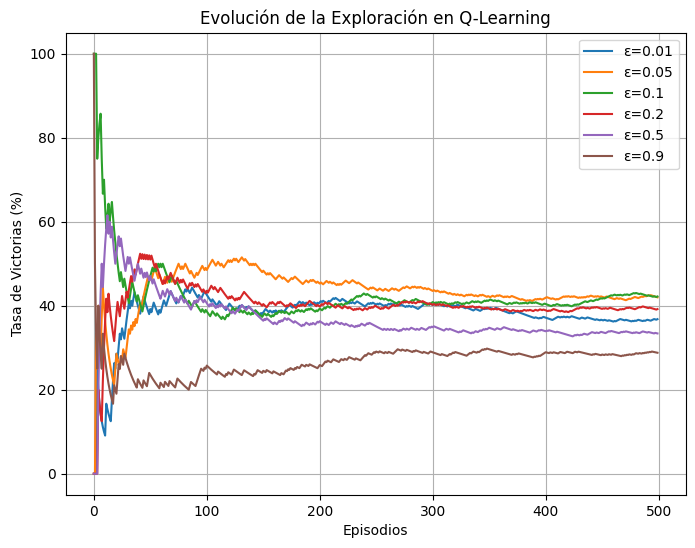

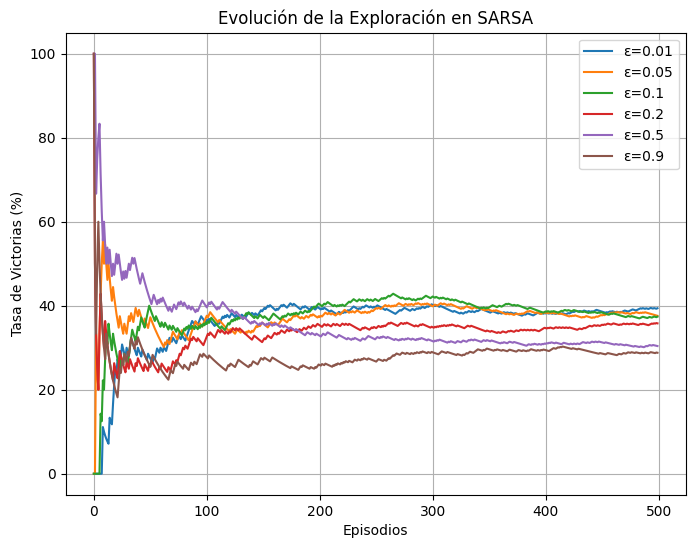

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

exploration_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.9]  # Diferentes niveles de exploración
num_episodes = 500  # Más episodios para observar patrones claros

# Diccionarios para almacenar tasas de victorias por episodio
qlearning_results = {epsilon: [] for epsilon in exploration_rates}
sarsa_results = {epsilon: [] for epsilon in exploration_rates}

# Ejecutar simulaciones
for epsilon in exploration_rates:
    # Simulación para Q-Learning
    episodes, _ = run_agent(QLearner, num_episodes=num_episodes, learning_rate=0.1, discount_factor=0.9, ratio_exploration=epsilon)
    win_rates_q = np.cumsum([1 if ep == 1 else 0 for ep in episodes]) / np.arange(1, num_episodes+1) * 100
    qlearning_results[epsilon] = win_rates_q

    # Simulación para SARSA
    episodes, _ = run_agent(SARSALearner, num_episodes=num_episodes, learning_rate=0.1, discount_factor=0.9, ratio_exploration=epsilon)
    win_rates_sarsa = np.cumsum([1 if ep == 1 else 0 for ep in episodes]) / np.arange(1, num_episodes+1) * 100
    sarsa_results[epsilon] = win_rates_sarsa

# **Gráfico para Q-Learning**
plt.figure(figsize=(8, 6))
for epsilon, win_rates in qlearning_results.items():
    plt.plot(range(num_episodes), win_rates, linestyle='-', label=f'ε={epsilon}')

plt.xlabel("Episodios")
plt.ylabel("Tasa de Victorias (%)")
plt.title("Evolución de la Exploración en Q-Learning")
plt.legend()
plt.grid(True)
plt.show()

# **Gráfico para SARSA**
plt.figure(figsize=(8, 6))
for epsilon, win_rates in sarsa_results.items():
    plt.plot(range(num_episodes), win_rates, linestyle='-', label=f'ε={epsilon}')

plt.xlabel("Episodios")
plt.ylabel("Tasa de Victorias (%)")
plt.title("Evolución de la Exploración en SARSA")
plt.legend()
plt.grid(True)
plt.show()
